In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns

# Import API key
#from api_keys import key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

651

In [6]:
# OpenWeatherMap API Key
api_key = api_keys.key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

params = { "appid" :key,"units":"imperial" }

In [7]:
# Create the Dataframe
LatLon = pd.DataFrame({"Latitude":lats,"Longitude":lngs})        
LatLon.head()

LatLon["Closest City name"] = ""
LatLon["Closest Country code"] = ""
for index,row in LatLon.iterrows():
    city = citipy.nearest_city(row["Latitude"],row["Longitude"])
    LatLon.set_value(index,"Closest City name",city.city_name)
    LatLon.set_value(index,"Closest Country code",city.country_code.upper())

# Get rid of the Duplicates
ULatLon = LatLon.dropna()
ULatLon = ULatLon.drop_duplicates()

# Picking a sample of 700 cities to proceed with analysis
SampCities = ULatLon.sample(700)
SampCities = SampCities.reset_index()
#SampCities = SampCities.iloc[:,[3,4]]
SampCities.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


,index,Latitude,Longitude,Closest City name,Closest Country code
0,804,-37.767646,26.339311,port elizabeth,ZA
1,608,-69.604367,-91.529435,punta arenas,CL
2,623,46.714215,-15.395321,muros,ES
3,1274,-59.484319,25.442725,kruisfontein,ZA
4,548,-26.627107,-11.883936,jamestown,SH


In [8]:
# loop throught the Cities and append them to a dataframe
for index,row in SampCities.iterrows():
    params["q"] =f'{row["Closest City name"]},{row["Closest Country code"]}'
    print(f"Processing Record {index+1} of {len(SampCities)} | for City,Country: {params['q']}")
    CWResp = requests.get(url,params)
    print(CWResp.url)
    CWRespJson = CWResp.json()

Processing Record 1 of 700 | for City,Country: port elizabeth,ZA
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=port+elizabeth%2CZA
Processing Record 2 of 700 | for City,Country: punta arenas,CL
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=punta+arenas%2CCL
Processing Record 3 of 700 | for City,Country: muros,ES
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=muros%2CES
Processing Record 4 of 700 | for City,Country: kruisfontein,ZA
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=kruisfontein%2CZA
Processing Record 5 of 700 | for City,Country: jamestown,S

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=masvingo%2CZW
Processing Record 39 of 700 | for City,Country: beringovskiy,RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=beringovskiy%2CRU
Processing Record 40 of 700 | for City,Country: taolanaro,MG
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=taolanaro%2CMG
Processing Record 41 of 700 | for City,Country: tarancon,ES
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=tarancon%2CES
Processing Record 42 of 700 | for City,Country: albany,AU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=bluff%2CNZ
Processing Record 76 of 700 | for City,Country: vao,NC
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=vao%2CNC
Processing Record 77 of 700 | for City,Country: beringovskiy,RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=beringovskiy%2CRU
Processing Record 78 of 700 | for City,Country: djambala,CG
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=djambala%2CCG
Processing Record 79 of 700 | for City,Country: tomatlan,MX
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=lavrentiya%2CRU
Processing Record 112 of 700 | for City,Country: sao filipe,CV
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=sao+filipe%2CCV
Processing Record 113 of 700 | for City,Country: codrington,AG
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=codrington%2CAG
Processing Record 114 of 700 | for City,Country: saskylakh,RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=saskylakh%2CRU
Processing Record 115 of 700 | for City,Country: dikson,RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=richards+bay%2CZA
Processing Record 149 of 700 | for City,Country: esso,RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=esso%2CRU
Processing Record 150 of 700 | for City,Country: arraial do cabo,BR
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=arraial+do+cabo%2CBR
Processing Record 151 of 700 | for City,Country: jamestown,SH
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=jamestown%2CSH
Processing Record 152 of 700 | for City,Country: tarancon,ES
http://api.openweathermap.org/data/2.5/weather?units=Imperia

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=saldanha%2CZA
Processing Record 185 of 700 | for City,Country: punta arenas,CL
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=punta+arenas%2CCL
Processing Record 186 of 700 | for City,Country: kruisfontein,ZA
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=kruisfontein%2CZA
Processing Record 187 of 700 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=ushuaia%2CAR
Processing Record 188 of 700 | for City,Country: poum,NC
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=mehamn%2CNO
Processing Record 222 of 700 | for City,Country: ribeira grande,PT
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=ribeira+grande%2CPT
Processing Record 223 of 700 | for City,Country: taolanaro,MG
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=taolanaro%2CMG
Processing Record 224 of 700 | for City,Country: morondava,MG
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=morondava%2CMG
Processing Record 225 of 700 | for City,Country: tezu,IN
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=burica%2CPA
Processing Record 257 of 700 | for City,Country: albany,AU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=albany%2CAU
Processing Record 258 of 700 | for City,Country: sola,VU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=sola%2CVU
Processing Record 259 of 700 | for City,Country: touros,BR
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=touros%2CBR
Processing Record 260 of 700 | for City,Country: nandu,CN
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc72313

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=ponta+do+sol%2CPT
Processing Record 295 of 700 | for City,Country: hambantota,LK
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=hambantota%2CLK
Processing Record 296 of 700 | for City,Country: amderma,RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=amderma%2CRU
Processing Record 297 of 700 | for City,Country: albany,AU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=albany%2CAU
Processing Record 298 of 700 | for City,Country: mataura,PF
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=vostok%2CRU
Processing Record 332 of 700 | for City,Country: college,US
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=college%2CUS
Processing Record 333 of 700 | for City,Country: butaritari,KI
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=butaritari%2CKI
Processing Record 334 of 700 | for City,Country: mar del plata,AR
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=mar+del+plata%2CAR
Processing Record 335 of 700 | for City,Country: tondano,ID
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=pasni%2CPK
Processing Record 369 of 700 | for City,Country: zhengjiatun,CN
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=zhengjiatun%2CCN
Processing Record 370 of 700 | for City,Country: hilo,US
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=hilo%2CUS
Processing Record 371 of 700 | for City,Country: le port,RE
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=le+port%2CRE
Processing Record 372 of 700 | for City,Country: bredasdorp,ZA
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=cape+town%2CZA
Processing Record 405 of 700 | for City,Country: hay river,CA
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=hay+river%2CCA
Processing Record 406 of 700 | for City,Country: rikitea,PF
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=rikitea%2CPF
Processing Record 407 of 700 | for City,Country: bajil,YE
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=bajil%2CYE
Processing Record 408 of 700 | for City,Country: la asuncion,VE
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6321

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=illoqqortoormiut%2CGL
Processing Record 441 of 700 | for City,Country: provideniya,RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=provideniya%2CRU
Processing Record 442 of 700 | for City,Country: taolanaro,MG
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=taolanaro%2CMG
Processing Record 443 of 700 | for City,Country: port alfred,ZA
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=port+alfred%2CZA
Processing Record 444 of 700 | for City,Country: hermanus,ZA
http://api.openweathermap.org/data/2.5/weather?uni

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=port-gentil%2CGA
Processing Record 478 of 700 | for City,Country: kurchum,KZ
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=kurchum%2CKZ
Processing Record 479 of 700 | for City,Country: hilton head island,US
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=hilton+head+island%2CUS
Processing Record 480 of 700 | for City,Country: port alfred,ZA
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=port+alfred%2CZA
Processing Record 481 of 700 | for City,Country: clyde river,CA
http://api.openweathermap.org/data/2.5/wea

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=starkville%2CUS
Processing Record 514 of 700 | for City,Country: porto novo,CV
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=porto+novo%2CCV
Processing Record 515 of 700 | for City,Country: galiwinku,AU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=galiwinku%2CAU
Processing Record 516 of 700 | for City,Country: fallon,US
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=fallon%2CUS
Processing Record 517 of 700 | for City,Country: mataura,PF
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=butaritari%2CKI
Processing Record 552 of 700 | for City,Country: santa cruz cabralia,BR
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=santa+cruz+cabralia%2CBR
Processing Record 553 of 700 | for City,Country: raga,SD
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=raga%2CSD
Processing Record 554 of 700 | for City,Country: illoqqortoormiut,GL
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=illoqqortoormiut%2CGL
Processing Record 555 of 700 | for City,Country: whitianga,NZ
http://api.openweathermap.org/data/2.5/

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=chitungwiza%2CZW
Processing Record 589 of 700 | for City,Country: yumen,CN
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=yumen%2CCN
Processing Record 590 of 700 | for City,Country: qaanaaq,GL
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=qaanaaq%2CGL
Processing Record 591 of 700 | for City,Country: bredasdorp,ZA
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=bredasdorp%2CZA
Processing Record 592 of 700 | for City,Country: avarua,CK
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd63214

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=komsomolskiy%2CRU
Processing Record 625 of 700 | for City,Country: opuwo,NA
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=opuwo%2CNA
Processing Record 626 of 700 | for City,Country: yellowknife,CA
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=yellowknife%2CCA
Processing Record 627 of 700 | for City,Country: busselton,AU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=busselton%2CAU
Processing Record 628 of 700 | for City,Country: safwah,SA
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=vagur%2CFO
Processing Record 662 of 700 | for City,Country: nanortalik,GL
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=nanortalik%2CGL
Processing Record 663 of 700 | for City,Country: hobart,AU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=hobart%2CAU
Processing Record 664 of 700 | for City,Country: khani,RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=khani%2CRU
Processing Record 665 of 700 | for City,Country: wukari,NG
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426af

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=santa+rosa%2CAR
Processing Record 698 of 700 | for City,Country: puerto escondido,MX
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=puerto+escondido%2CMX
Processing Record 699 of 700 | for City,Country: rikitea,PF
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=rikitea%2CPF
Processing Record 700 of 700 | for City,Country: new norfolk,AU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=new+norfolk%2CAU


In [9]:
# Perform a weather check on each of the cities using a series of successive API calls.
# Include a print log of each city as it's being processed with the city number, city name, and requested URL.

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
params = { "appid" :key,"units":"imperial" }

print("-----------------------------------------")
print("Beginning Data Retrieval")
print("-----------------------------------------\n")

# loop throught the Cities and append them to a dataframe
for index,row in SampCities.iterrows():
    params["q"] =f'{row["Closest City name"]},{row["Closest Country code"]}'
    print(f"Processing Record {index+1} of {len(SampCities)} | for City,Country: {params['q']}")
    CWResp = requests.get(url,params)
    print(CWResp.url)
    CWRespJson = CWResp.json()
    
    SampCities.set_value(index,"Latitude",CWRespJson.get("coord",{}).get("lat"))
    SampCities.set_value(index,"Longitude",CWRespJson.get("coord",{}).get("lon"))
    SampCities.set_value(index,"Temperature",CWRespJson.get("coord",{}).get("lon"))
    SampCities.set_value(index,"Max Temp",CWRespJson.get("main",{}).get("temp_max"))
    SampCities.set_value(index,"Wind speed",CWRespJson.get("wind",{}).get("speed"))
    SampCities.set_value(index,"Humidity",CWRespJson.get("main",{}).get("humidity"))
    SampCities.set_value(index,"Cloudiness",CWRespJson.get("clouds",{}).get("all"))
    SampCities.set_value(index,"Date",CWRespJson.get("dt"))

print("-----------------------------------------")
print("Data Retrieval Complete")
print("-----------------------------------------")

-----------------------------------------
Beginning Data Retrieval
-----------------------------------------

Processing Record 1 of 700 | for City,Country: port elizabeth,ZA
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=port+elizabeth%2CZA


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_l

Processing Record 2 of 700 | for City,Country: punta arenas,CL
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=punta+arenas%2CCL
Processing Record 3 of 700 | for City,Country: muros,ES
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=muros%2CES
Processing Record 4 of 700 | for City,Country: kruisfontein,ZA
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=kruisfontein%2CZA
Processing Record 5 of 700 | for City,Country: jamestown,SH
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=jamestown%2CSH
Processing Record 6 of 700 | for City,Country: honningsvag,NO
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=honningsvag%2CNO
Processing Record 7 of 700 | for City,Country: hermanus,ZA
http://api.openweathermap.org/data/2.5/weat

http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=namibe%2CAO
Processing Record 49 of 700 | for City,Country: nikolskoye,RU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=nikolskoye%2CRU
Processing Record 50 of 700 | for City,Country: rungata,KI
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=rungata%2CKI
Processing Record 51 of 700 | for City,Country: port alfred,ZA
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=port+alfred%2CZA
Processing Record 52 of 700 | for City,Country: orotukan,RU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=orotukan%2CRU
Processing Record 53 of 700 | for City,Country: castro,CL
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=castro%2

http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=samusu%2CWS
Processing Record 98 of 700 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=ushuaia%2CAR
Processing Record 99 of 700 | for City,Country: port alfred,ZA
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=port+alfred%2CZA
Processing Record 100 of 700 | for City,Country: rikitea,PF
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=rikitea%2CPF
Processing Record 101 of 700 | for City,Country: thompson,CA
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=thompson%2CCA
Processing Record 102 of 700 | for City,Country: san borja,BO
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=san+borj

http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=nanortalik%2CGL
Processing Record 145 of 700 | for City,Country: evensk,RU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=evensk%2CRU
Processing Record 146 of 700 | for City,Country: thompson,CA
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=thompson%2CCA
Processing Record 147 of 700 | for City,Country: hobart,AU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=hobart%2CAU
Processing Record 148 of 700 | for City,Country: richards bay,ZA
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=richards+bay%2CZA
Processing Record 149 of 700 | for City,Country: esso,RU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=esso%2CRU

http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=albany%2CAU
Processing Record 192 of 700 | for City,Country: pareora,NZ
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=pareora%2CNZ
Processing Record 193 of 700 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=ushuaia%2CAR
Processing Record 194 of 700 | for City,Country: beringovskiy,RU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=beringovskiy%2CRU
Processing Record 195 of 700 | for City,Country: tura,RU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=tura%2CRU
Processing Record 196 of 700 | for City,Country: tiksi,RU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=tiksi%2CRU
Proce

http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=praia+da+vitoria%2CPT
Processing Record 238 of 700 | for City,Country: tonder,DK
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=tonder%2CDK
Processing Record 239 of 700 | for City,Country: kapaa,US
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=kapaa%2CUS
Processing Record 240 of 700 | for City,Country: butaritari,KI
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=butaritari%2CKI
Processing Record 241 of 700 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=ushuaia%2CAR
Processing Record 242 of 700 | for City,Country: chillicothe,US
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=chil

http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=mataura%2CPF
Processing Record 285 of 700 | for City,Country: punta arenas,CL
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=punta+arenas%2CCL
Processing Record 286 of 700 | for City,Country: jamestown,SH
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=jamestown%2CSH
Processing Record 287 of 700 | for City,Country: vargem grande do sul,BR
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=vargem+grande+do+sul%2CBR
Processing Record 288 of 700 | for City,Country: hobart,AU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=hobart%2CAU
Processing Record 289 of 700 | for City,Country: henties bay,NA
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc72313

http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=vostok%2CRU
Processing Record 332 of 700 | for City,Country: college,US
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=college%2CUS
Processing Record 333 of 700 | for City,Country: butaritari,KI
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=butaritari%2CKI
Processing Record 334 of 700 | for City,Country: mar del plata,AR
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=mar+del+plata%2CAR
Processing Record 335 of 700 | for City,Country: tondano,ID
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=tondano%2CID
Processing Record 336 of 700 | for City,Country: rikitea,PF
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=

http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=severo-kurilsk%2CRU
Processing Record 379 of 700 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=ushuaia%2CAR
Processing Record 380 of 700 | for City,Country: chuy,UY
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=chuy%2CUY
Processing Record 381 of 700 | for City,Country: kyrksaeterora,NO
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=kyrksaeterora%2CNO
Processing Record 382 of 700 | for City,Country: thyboron,DK
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=thyboron%2CDK
Processing Record 383 of 700 | for City,Country: hobart,AU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=hob

http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=hukuntsi%2CBW
Processing Record 426 of 700 | for City,Country: hobart,AU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=hobart%2CAU
Processing Record 427 of 700 | for City,Country: jamestown,SH
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=jamestown%2CSH
Processing Record 428 of 700 | for City,Country: hobart,AU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=hobart%2CAU
Processing Record 429 of 700 | for City,Country: albany,AU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=albany%2CAU
Processing Record 430 of 700 | for City,Country: tuktoyaktuk,CA
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=tuktoyaktuk%2C

http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=collie%2CAU
Processing Record 473 of 700 | for City,Country: cherskiy,RU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=cherskiy%2CRU
Processing Record 474 of 700 | for City,Country: busselton,AU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=busselton%2CAU
Processing Record 475 of 700 | for City,Country: hilo,US
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=hilo%2CUS
Processing Record 476 of 700 | for City,Country: lebu,CL
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=lebu%2CCL
Processing Record 477 of 700 | for City,Country: port-gentil,GA
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=port-gentil%2CGA
Pro

http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=bambous+virieux%2CMU
Processing Record 520 of 700 | for City,Country: fernie,CA
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=fernie%2CCA
Processing Record 521 of 700 | for City,Country: victoria,SC
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=victoria%2CSC
Processing Record 522 of 700 | for City,Country: isangel,VU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=isangel%2CVU
Processing Record 523 of 700 | for City,Country: kavieng,PG
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=kavieng%2CPG
Processing Record 524 of 700 | for City,Country: sergeyevka,KZ
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=sergey

http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=beringovskiy%2CRU
Processing Record 567 of 700 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=ushuaia%2CAR
Processing Record 568 of 700 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=ushuaia%2CAR
Processing Record 569 of 700 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=ushuaia%2CAR
Processing Record 570 of 700 | for City,Country: bredasdorp,ZA
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=bredasdorp%2CZA
Processing Record 571 of 700 | for City,Country: dikson,RU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=dikson%

http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=bluff%2CNZ
Processing Record 615 of 700 | for City,Country: fereydunshahr,IR
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=fereydunshahr%2CIR
Processing Record 616 of 700 | for City,Country: ponta do sol,PT
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=ponta+do+sol%2CPT
Processing Record 617 of 700 | for City,Country: longyearbyen,SJ
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=longyearbyen%2CSJ
Processing Record 618 of 700 | for City,Country: manggar,ID
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=manggar%2CID
Processing Record 619 of 700 | for City,Country: albany,AU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units

http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=nanortalik%2CGL
Processing Record 663 of 700 | for City,Country: hobart,AU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=hobart%2CAU
Processing Record 664 of 700 | for City,Country: khani,RU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=khani%2CRU
Processing Record 665 of 700 | for City,Country: wukari,NG
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=wukari%2CNG
Processing Record 666 of 700 | for City,Country: queanbeyan,AU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=queanbeyan%2CAU
Processing Record 667 of 700 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=ushuaia%2CAR
Pro

In [10]:
# Drop cities without infos
SampCities = SampCities.dropna()
CityWeather = pd.DataFrame({"City":SampCities["Closest City name"],
                         "Cloudiness":SampCities["Cloudiness"],
                         "Country":SampCities["Closest Country code"],
                         "Date":SampCities["Date"],
                         "Humidity":SampCities["Humidity"],
                         "Lat":SampCities["Latitude"],
                         "Lng":SampCities["Longitude"],
                         "Max Temp":SampCities["Max Temp"],
                         "Wind Speed":SampCities["Wind speed"],})

# Save CSV of all data retrieved 
CityWeather.to_csv("Sample_City_Weather_data.csv")

# Count Weather data
CityWeather.count()

City          605
Cloudiness    605
Country       605
Date          605
Humidity      605
Lat           605
Lng           605
Max Temp      605
Wind Speed    605
dtype: int64

In [11]:
# Display the City Dataa Frame
CityWeather["Date"]=CityWeather["Date"].astype('int')
CityWeather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,port elizabeth,0.0,ZA,1529586000,27.0,-33.92,25.57,75.20,8.05
1,punta arenas,40.0,CL,1529586000,100.0,-53.16,-70.91,32.00,20.80
2,muros,40.0,ES,1529586000,65.0,42.77,-9.06,78.80,6.93
3,kruisfontein,0.0,ZA,1529587809,65.0,-34.00,24.73,66.32,9.19
4,jamestown,32.0,SH,1529587809,100.0,-15.94,-5.72,70.82,17.13


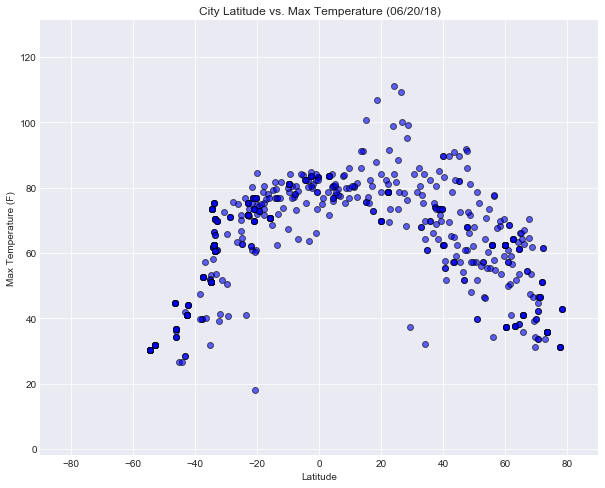

In [12]:
# Use the scatter functionUse the scatter function
# Draw Latitude vs Temperature ChartDraw Latitude vs Temperature 
sns.set_style("darkgrid") 
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(CityWeather['Lat'], CityWeather['Max Temp'], c='blue',alpha=.6, linewidth=1, edgecolor='black')
#Set x and y limits, title, labels
ax.set_xlim(-90, 90)
ax.set_ylim(min(CityWeather['Max Temp'])-20, max(CityWeather['Max Temp'])+20)
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
ax.set_title("City Latitude vs. Max Temperature (06/20/18)")
# Save png images for each scatter plot.
plt.savefig("CityLat-MaxTemp-06.20.18.png")
plt.show()

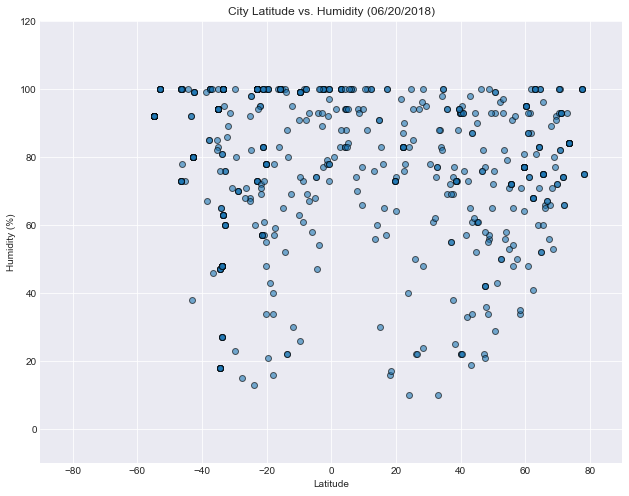

In [13]:
#Use the scatter function
#Draw Latitude vs Humidity Chart - diff method of drawing chart
sns.set_style("darkgrid") 
g = sns.lmplot(x="Lat", y='Humidity', data=CityWeather, size = 6.8,
           aspect=1.3,palette="blue", 
           scatter_kws={"alpha":.6,"linewidth":1, 
                        "edgecolor":'black',"marker":'o'}, fit_reg=False)
#Set x and y limits, title, labels
g = (g.set_axis_labels("Latitude","Humidity (%)")
     .set(xlim=(-90, 90), ylim=(min(CityWeather['Humidity'])-20, max(CityWeather['Humidity'])+20)))
plt.title("City Latitude vs. Humidity (06/20/2018)")
# Save png images for each scatter plot.
plt.savefig("CityLat-Humidity-06.20.18.png")
plt.show()

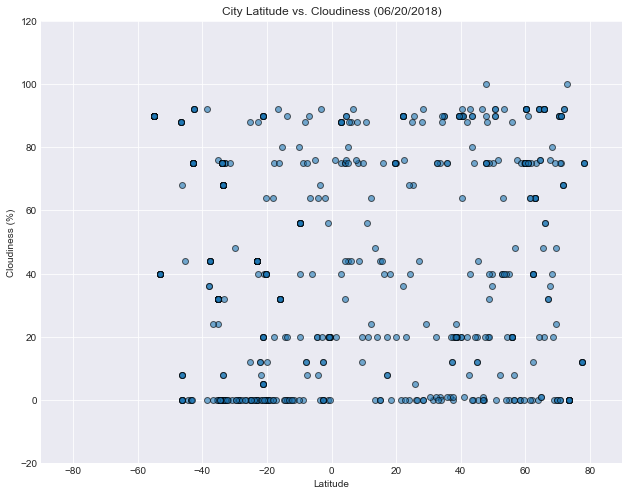

In [14]:
#Use the scatter function
#Draw Latitude vs Humidity Chart - diff method of drawing chart
sns.set_style("darkgrid") 
g = sns.lmplot(x="Lat", y='Cloudiness', data=CityWeather, size = 6.8,
           aspect=1.3,palette="blue", 
           scatter_kws={"alpha":.6,"linewidth":1, 
                        "edgecolor":'black',"marker":'o'}, fit_reg=False)
#Set x and y limits, title, labels
g = (g.set_axis_labels("Latitude","Cloudiness (%)")
     .set(xlim=(-90, 90), ylim=(min(CityWeather['Cloudiness'])-20, max(CityWeather['Cloudiness'])+20)))
plt.title("City Latitude vs. Cloudiness (06/20/2018)")
# Save png images for each scatter plot.
plt.savefig("CityLat-Cloudiness-06.20.18.png")
plt.show()

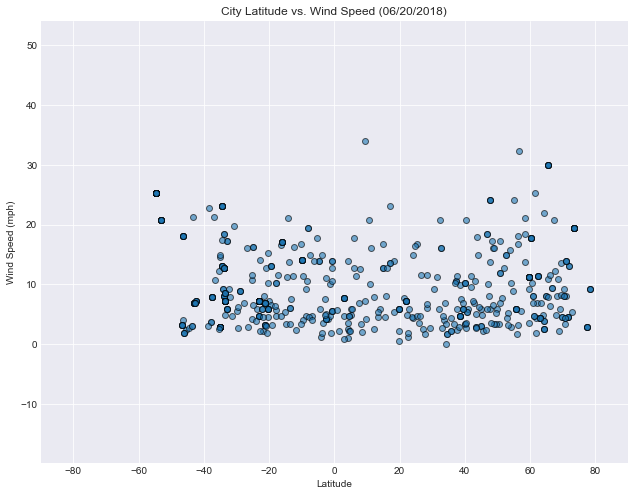

In [15]:
#Use the scatter function
#Draw Latitude vs Humidity Chart - diff method of drawing chart
sns.set_style("darkgrid") 
g = sns.lmplot(x="Lat", y='Wind Speed', data=CityWeather, size = 6.8,
           aspect=1.3,palette="blue", 
           scatter_kws={"alpha":.6,"linewidth":1, 
                        "edgecolor":'black',"marker":'o'}, fit_reg=False)
#Set x and y limits, title, labels
g = (g.set_axis_labels("Latitude","Wind Speed (mph)")
     .set(xlim=(-90, 90), ylim=(min(CityWeather['Wind Speed'])-20, max(CityWeather['Wind Speed'])+20)))
plt.title("City Latitude vs. Wind Speed (06/20/2018)")
# Save png images for each scatter plot.
plt.savefig("CityLat-WindSpeed-06.20.18.png")
plt.show()